In [1]:
import pandas as pd
import os
import seaborn as sns
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
for dirname, _, filenames in os.walk('../../Datas/ashre-energy/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../Datas/ashre-energy/test_df.pkl
../../Datas/ashre-energy/test.pkl
../../Datas/ashre-energy/train.pkl
../../Datas/ashre-energy/building_metadata.pkl
../../Datas/ashre-energy/weather_train.pkl
../../Datas/ashre-energy/test.csv
../../Datas/ashre-energy/sample_submission.csv
../../Datas/ashre-energy/train.csv
../../Datas/ashre-energy/weather_test.pkl
../../Datas/ashre-energy/building_metadata.csv
../../Datas/ashre-energy/weather_test.csv
../../Datas/ashre-energy/weather_train.csv
../../Datas/ashre-energy/submission.csv
../../Datas/ashre-energy/.gitignore
../../Datas/ashre-energy/train_df.pkl
../../Datas/ashre-energy/.ipynb_checkpoints/.gitignore-checkpoint


In [45]:
train = pd.read_csv('../../Datas/ashre-energy/train.csv',nrows=5)
test = pd.read_csv('../../Datas/ashre-energy/test.csv',nrows=5)
weather_test = pd.read_csv('../../Datas/ashre-energy/weather_test.csv',nrows=5)
weather_train = pd.read_csv('../../Datas/ashre-energy/weather_train.csv',nrows=5)

In [48]:
def printCol(df):
    print(df.head(1))
    print("================================================================================")

In [49]:
printCol(train)
printCol(test)
printCol(building_metadata)
printCol(weather_test)
printCol(weather_train)

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
   row_id  building_id  meter            timestamp
0       0            0      0  2017-01-01 00:00:00
   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432        2008          NaN
   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2017-01-01 00:00:00             17.8             4.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             11.7                NaN              1021.4           100.0   

   wind_speed  
0         3.6  
   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   

   wind_speed  
0 

In [50]:
submit = pd.read_csv('../../Datas/ashre-energy/submission.csv')

In [54]:
submit.loc[[87660],'row_id']

87660    87660
Name: row_id, dtype: int64

In [30]:
# train_pkl = pd.read_pickle('../../Datas/ashre-energy/weather_train.pkl')
train_pkl = pd.read_pickle('../../Datas/ashre-energy/train.pkl')
test_pkl = pd.read_pickle('../../Datas/ashre-energy/test.pkl')
weather_test_pkl = pd.read_pickle('../../Datas/ashre-energy/weather_test.pkl')
weather_train_pkl = pd.read_pickle('../../Datas/ashre-energy/weather_train.pkl')
building_pkl = pd.read_pickle('../../Datas/ashre-energy/building_metadata.pkl')

In [29]:
pkl_list = [train_pkl,test_pkl,weather_train_pkl, weather_test_pkl]
train_list = [train_pkl, weather_train_pkl]
test_list = [test_pkl, weather_test_pkl]

In [5]:
for df in pkl_list:
    print(df.isna().sum()/df.shape[0]*100)
    print('===============')

building_id      0.0
meter            0.0
timestamp        0.0
meter_reading    0.0
DT_M             0.0
DT_W             0.0
DT_D             0.0
DT_hour          0.0
DT_day_week      0.0
DT_day_month     0.0
DT_week_month    0.0
dtype: float64
row_id           0.0
building_id      0.0
meter            0.0
timestamp        0.0
DT_M             0.0
DT_W             0.0
DT_D             0.0
DT_hour          0.0
DT_day_week      0.0
DT_day_month     0.0
DT_week_month    0.0
dtype: float64
site_id                0.000000
timestamp              0.000000
air_temperature        0.039350
cloud_coverage        49.489529
dew_temperature        0.080845
precip_depth_1_hr     35.979052
sea_level_pressure     7.596603
wind_direction         4.484414
wind_speed             0.217496
dtype: float64
site_id                0.000000
timestamp              0.000000
air_temperature        0.037512
cloud_coverage        50.658808
dew_temperature        0.117947
precip_depth_1_hr     34.478057
sea_level_pre

In [3]:
def plotAll(df):
    graphs = []
    for col in df.columns.to_list():
        try:
            sns.distplot(df[col].dropna(),label=col)
            plt.show()
        except:
            print(col + " error")
    plt.figure(figsize=[30,30])
    sns.heatmap(df.dropna().corr(), annot=True)

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


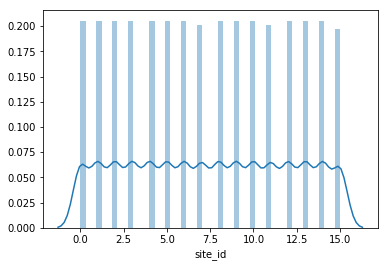

timestamp error


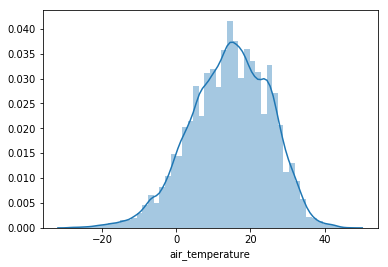

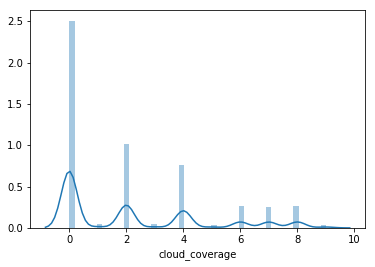

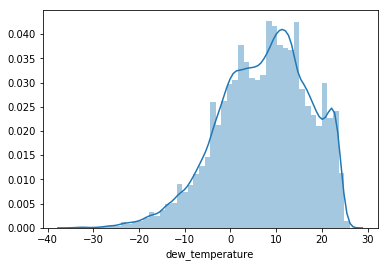

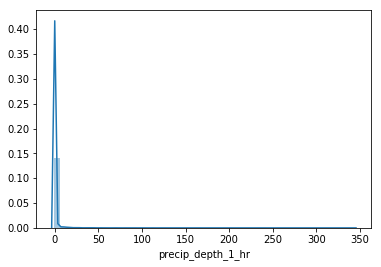

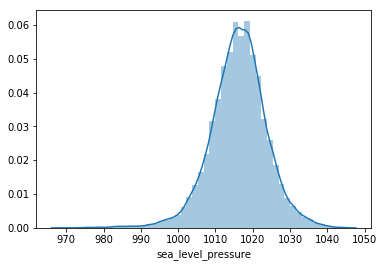

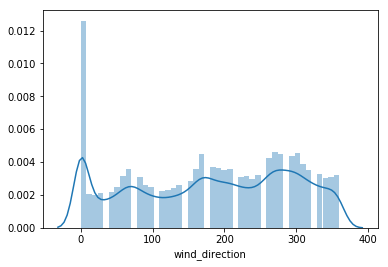

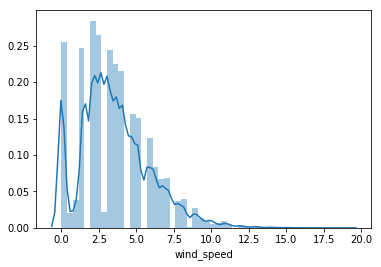

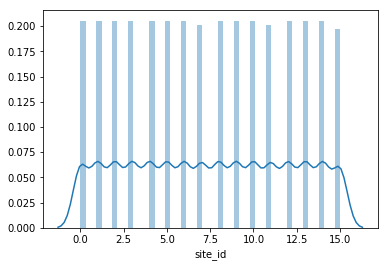

timestamp error


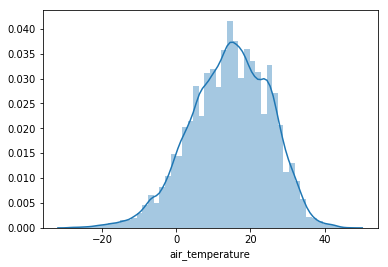

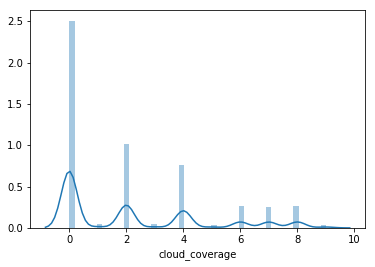

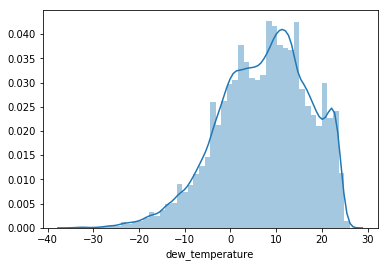

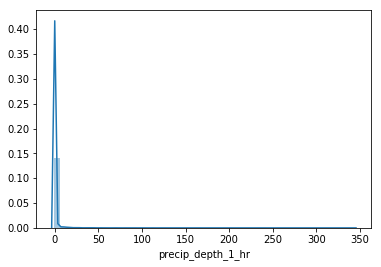

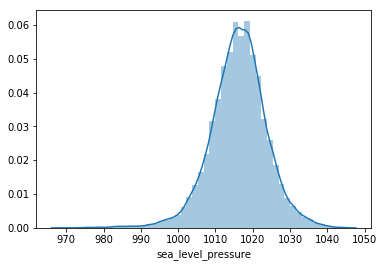

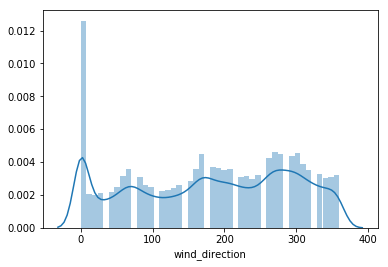

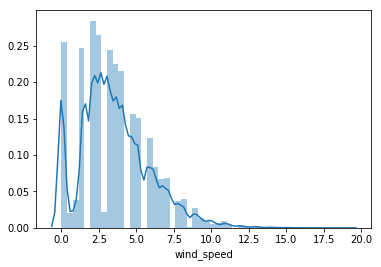

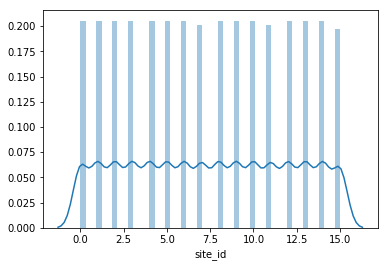

timestamp error


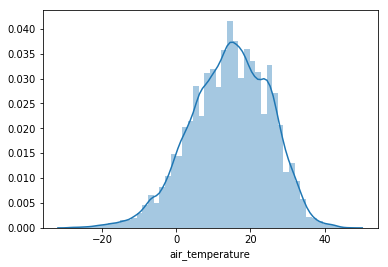

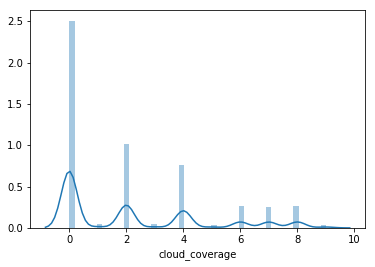

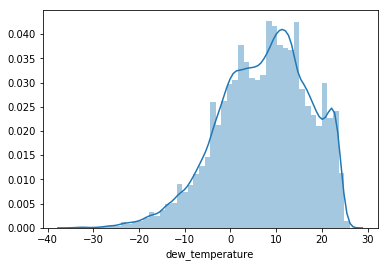

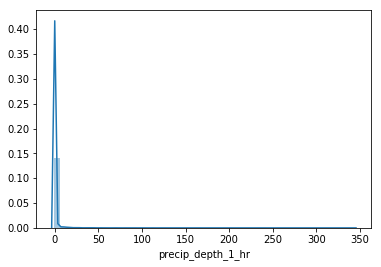

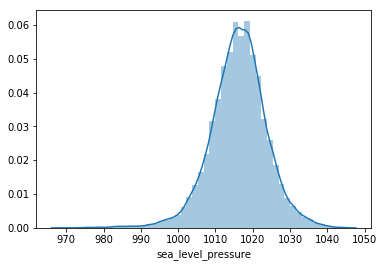

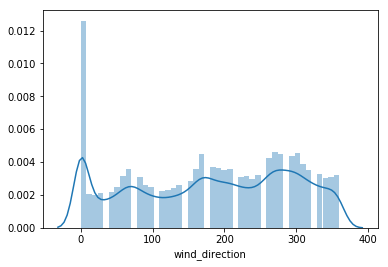

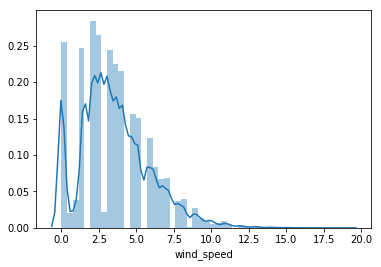

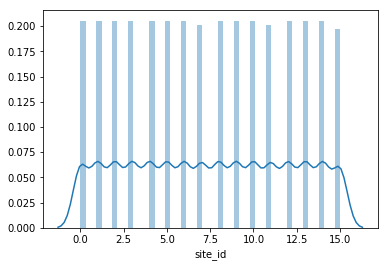

timestamp error


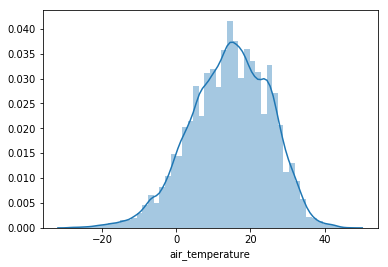

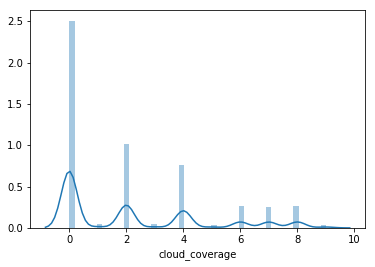

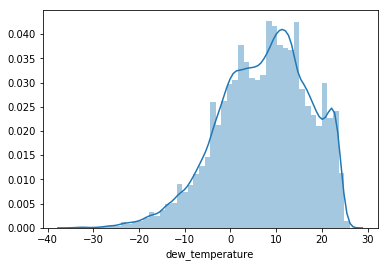

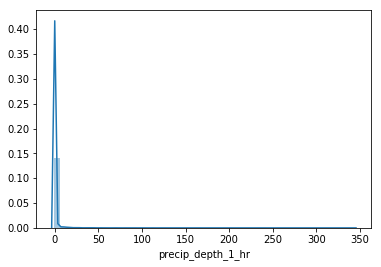

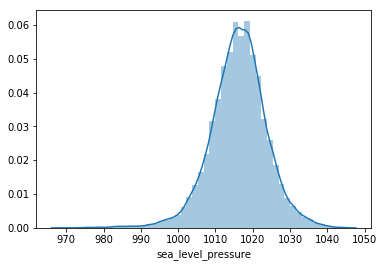

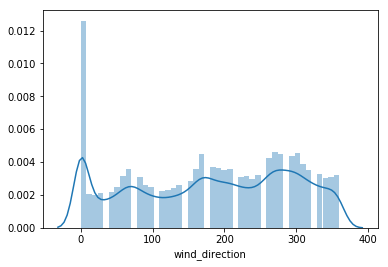

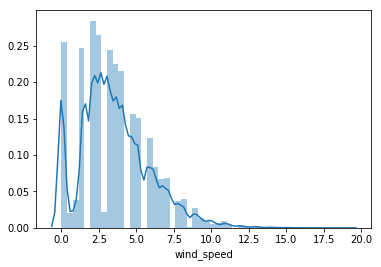

In [7]:
for df in pkl_list:
    print('===============================')
    print('===============================')
    print('===============================')
    plotAll(weather_train_pkl)

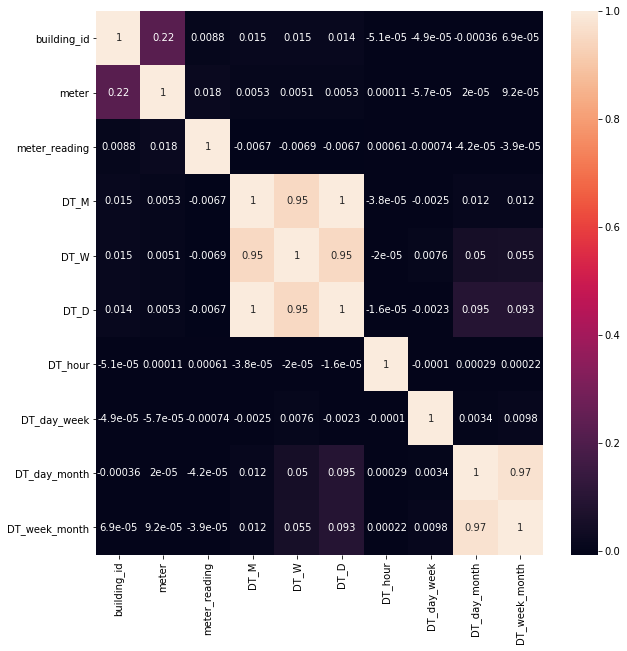

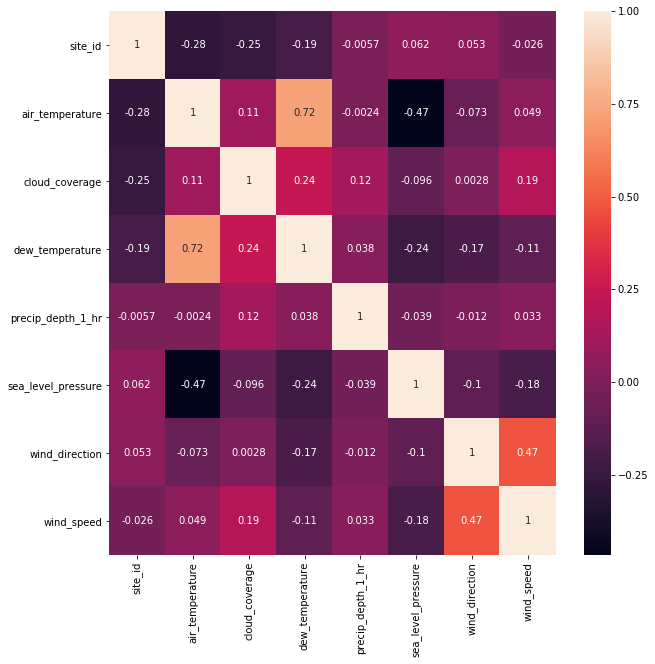

In [8]:
for lst in train_list:
    plt.figure(figsize=[10,10])
    sns.heatmap(lst.dropna().corr(), annot=True)

In [41]:
train = pd.concat([train_list[0],building_pkl],keys=['site_id','timestamp'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
train_df = pd.read_pickle('../../Datas/ashre-energy/train_df.pkl')

shape: (20216100, 23)
building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
DT_M                   0.000000
DT_W                   0.000000
DT_D                   0.000000
DT_hour                0.000000
DT_day_week            0.000000
DT_day_month           0.000000
DT_week_month          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built             0.000000
floor_count            0.000000
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
dtype: float64


/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


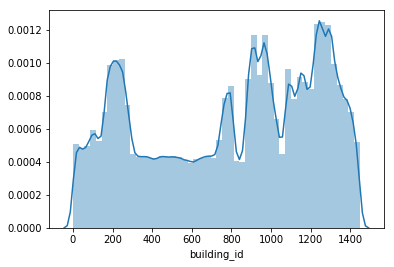

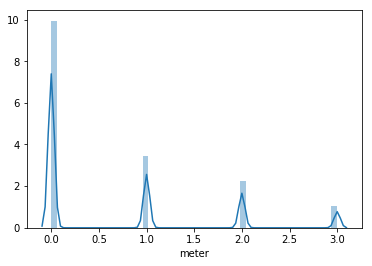

timestamp error


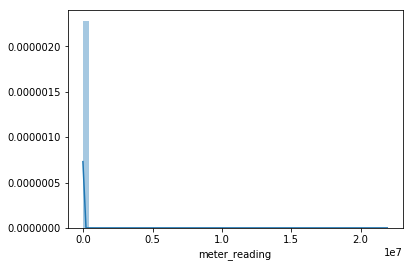

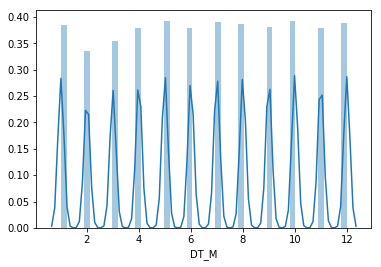

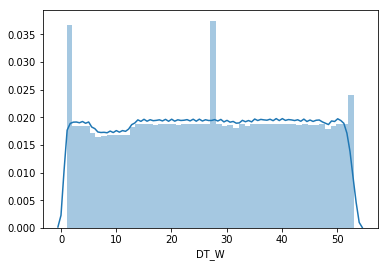

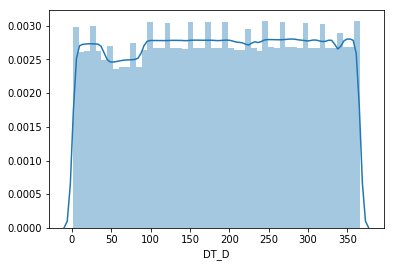

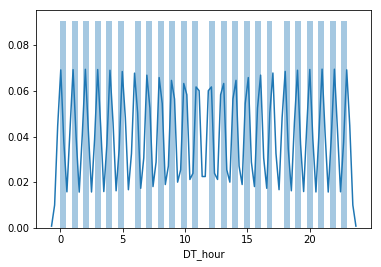

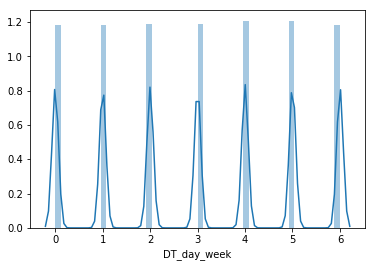

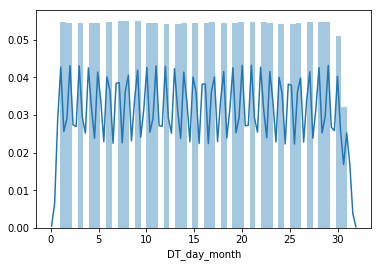

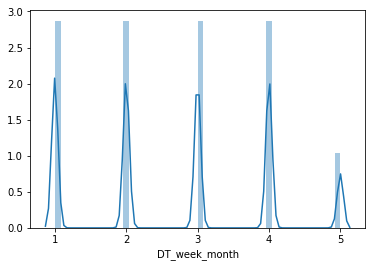

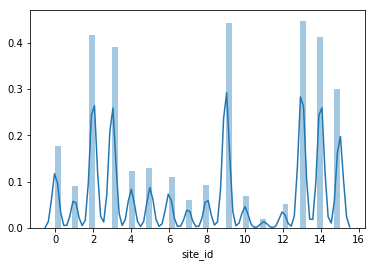

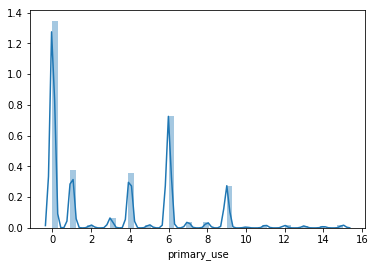

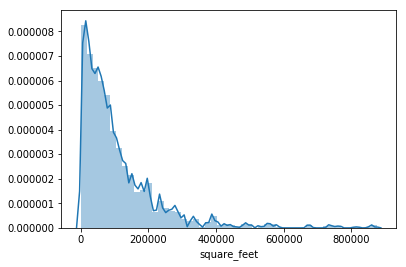

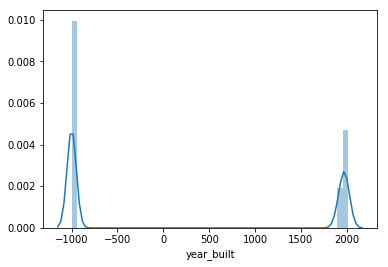

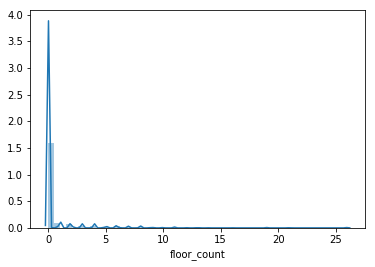

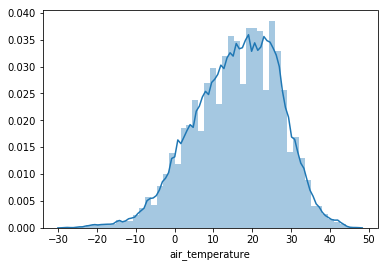

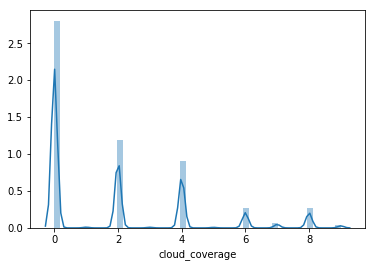

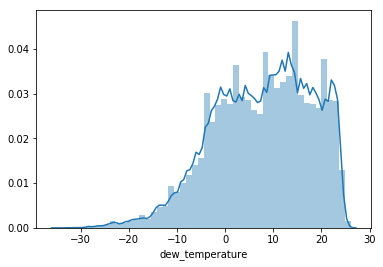

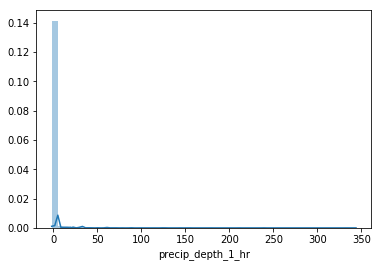

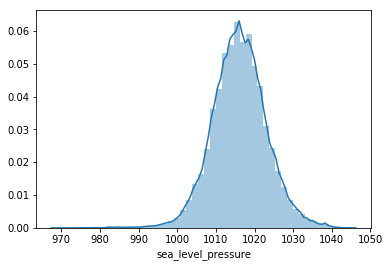

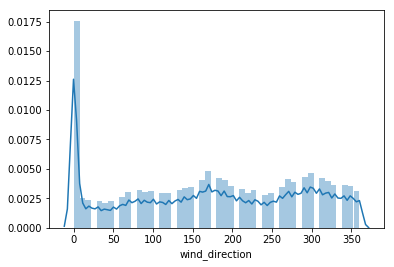

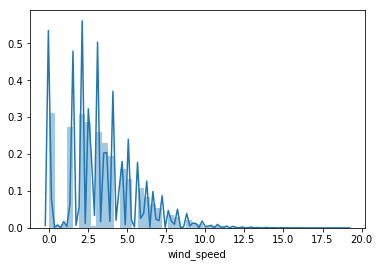

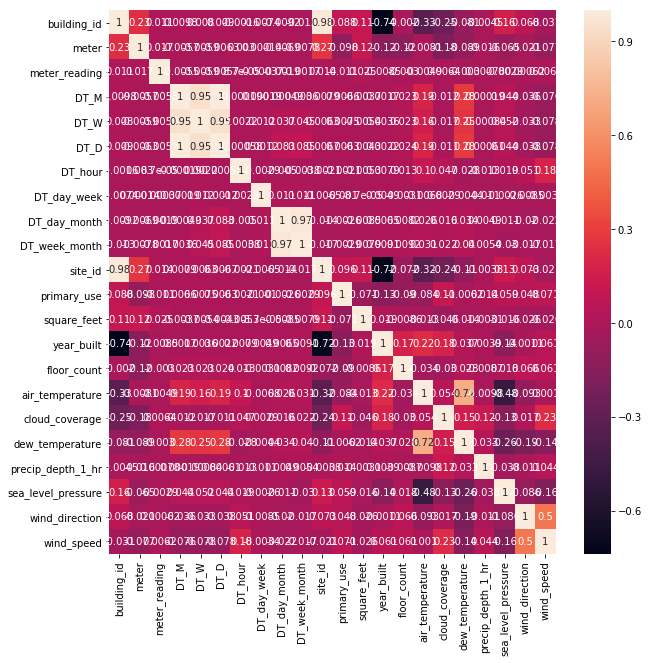

In [5]:
print('shape: ' + str(train_df.shape))
print(train_df.isna().sum()/train_df.shape[0]*100)
plotAll(train_df)

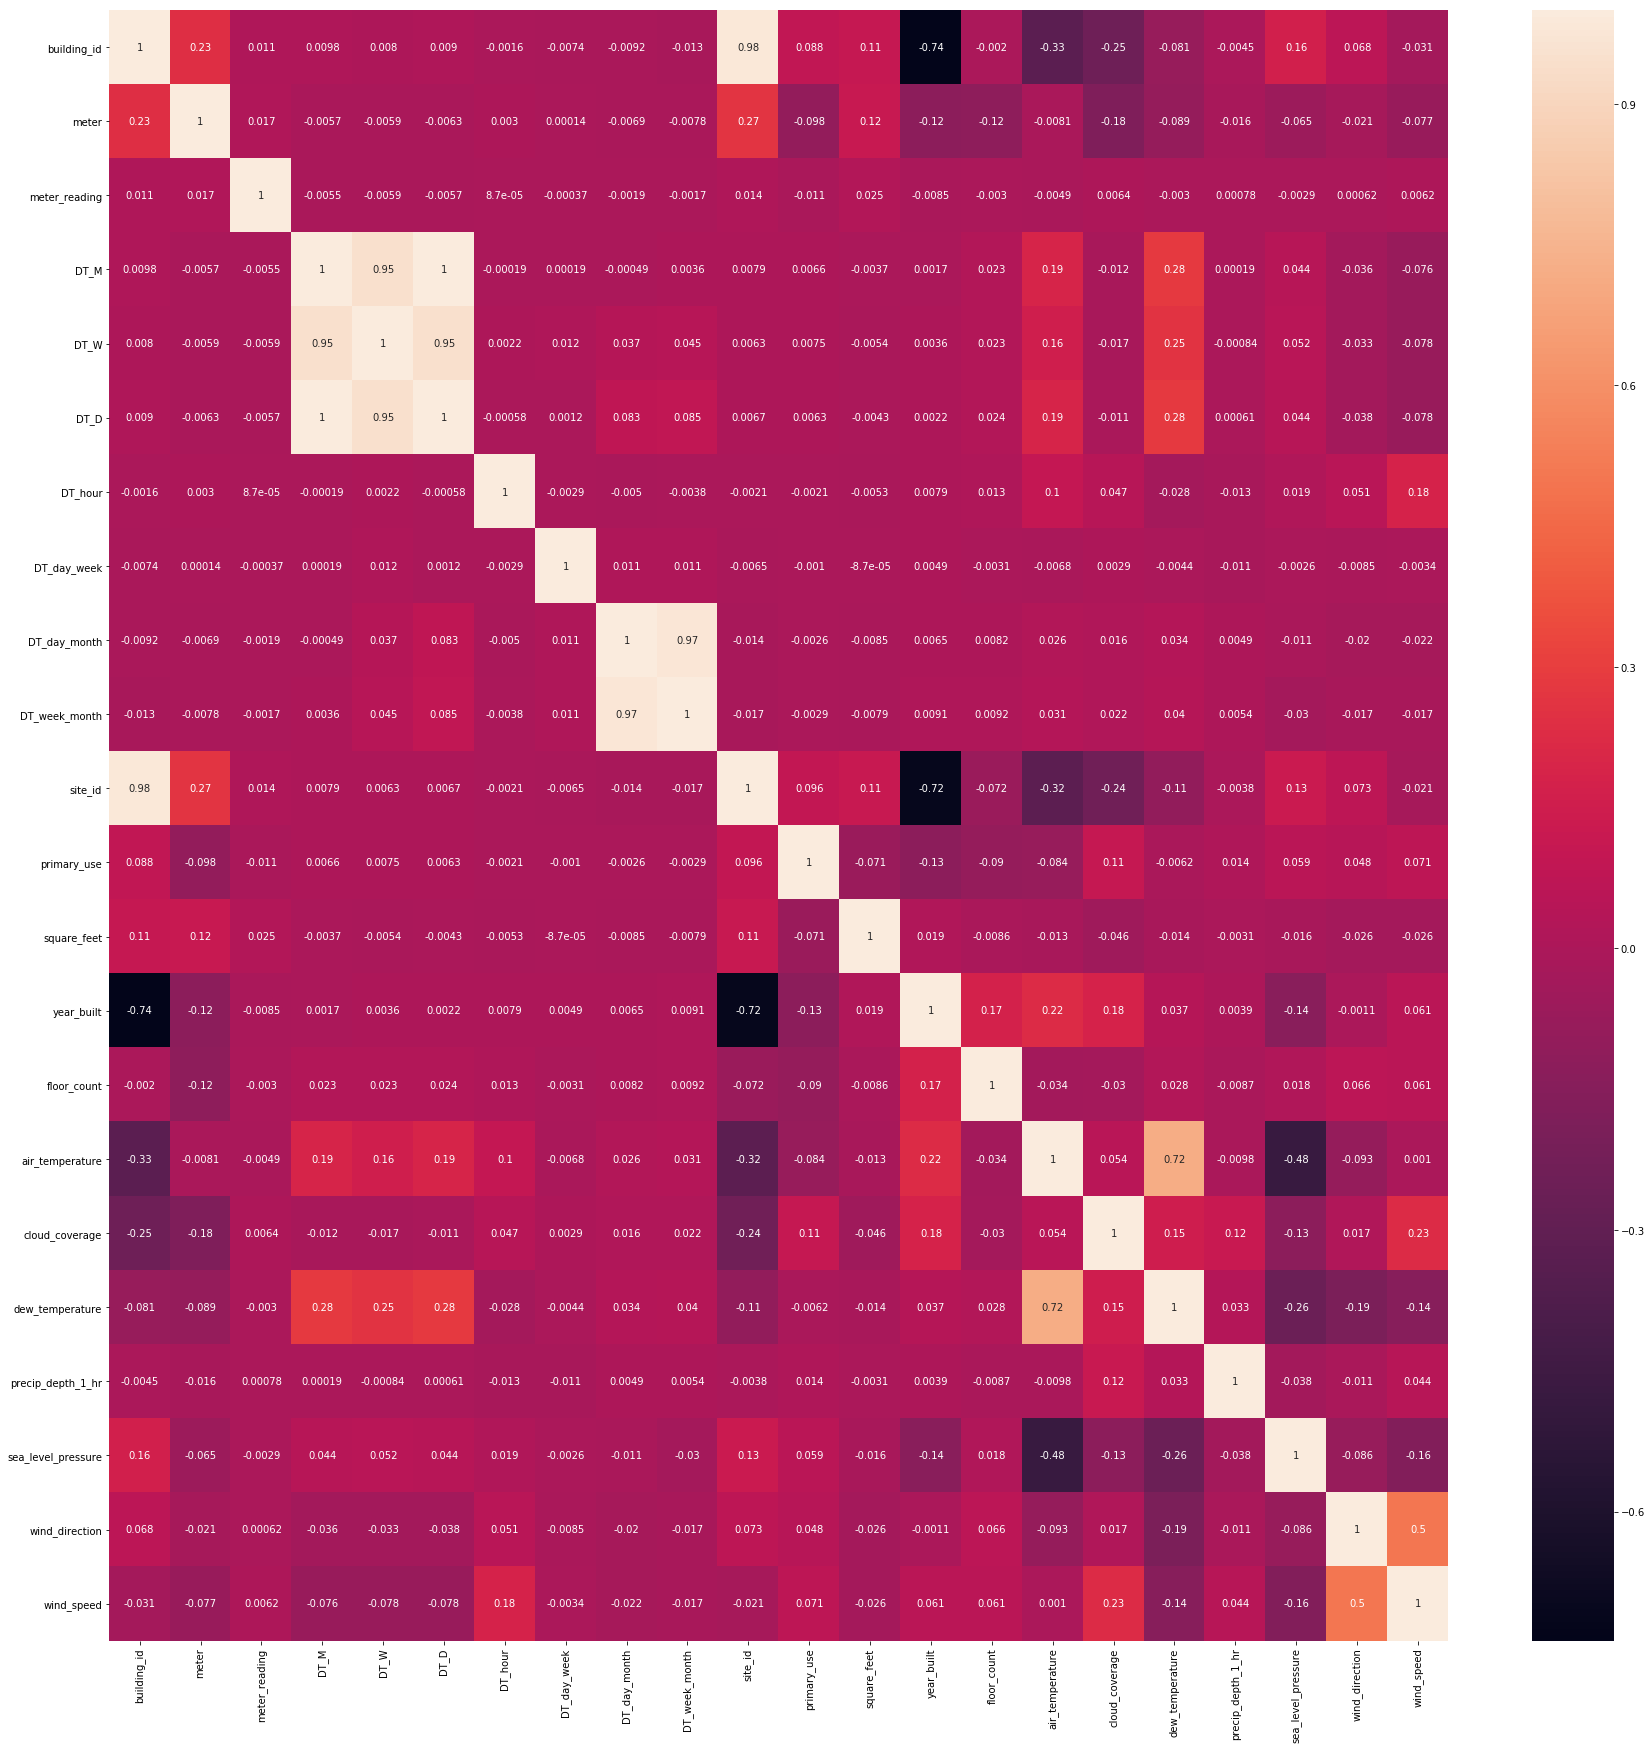

In [6]:
plt.figure(figsize=[30,30])
sns.heatmap(train_df.dropna().corr(), annot=True)